#1

SEM is measuring the accuracy of the mean if selecting different samples from the population. SD is measuring the variability of the individual data that is compared to the mean.

chatbot fixed version:

SEM measures the precision of the sample mean as an estimate of the population mean. It indicates how much the sample mean would fluctuate if we repeatedly drew different samples from the same population.

SD measures the variability of individual data points around the sample mean. It shows how much individual values in the dataset deviate from the average value.

SD captures how spread out individual data points are within a sample.

SEM captures how much the sample mean is expected to vary if different samples were taken.

#2

To use the **standard error of the mean (SEM)** to create a **95% confidence interval (CI)** that covers 95% of the bootstrapped sample means, follow these steps:

### 1. **Understand the Basics of Confidence Intervals and SEM:**
   - A **confidence interval** gives a range of values in which we expect the true population mean to fall with a certain level of confidence (e.g., 95%).
   - The **SEM** reflects the precision of the sample mean as an estimate of the population mean. It can be used to estimate how much the sample mean might vary if different samples were drawn.

### 2. **Formula for a 95% Confidence Interval:**
   The general formula for a 95% confidence interval using the SEM is:
   \[
   \text{CI} = \bar{x} \pm (Z_{\alpha/2} \times SEM)
   \]
   Where:
   - \(\bar{x}\) is the sample mean.
   - \(Z_{\alpha/2}\) is the **critical value** corresponding to a 95% confidence level from the standard normal distribution (for 95% CI, \(Z_{\alpha/2} = 1.96\)).
   - \(SEM\) is the standard error of the mean.

### 3. **Steps to Construct the 95% Confidence Interval:**

#### a. **Calculate the Sample Mean (\(\bar{x}\)):**
   This is simply the average of your observed data.

#### b. **Calculate the Standard Error of the Mean (SEM):**
   The formula is:
   \[
   SEM = \frac{SD}{\sqrt{n}}
   \]
   Where \(SD\) is the standard deviation of the sample and \(n\) is the sample size.

#### c. **Determine the Critical Value (Z) for a 95% Confidence Interval:**
   For a 95% confidence level, the critical value from the normal distribution is \(Z = 1.96\).

#### d. **Calculate the Confidence Interval:**
   Now, compute the confidence interval using the formula:
   \[
   \text{CI} = \bar{x} \pm (1.96 \times SEM)
   \]
   This interval will give you a range in which you expect 95% of the bootstrapped sample means to lie.

### 4. **Bootstrapped Sample Means:**
   When using bootstrapping, you generate multiple resampled datasets from the original sample, calculate the mean for each resampled dataset, and then create a distribution of those sample means. The 95% confidence interval you calculate using the SEM should cover approximately 95% of the **bootstrapped sample means** if your data follows normality assumptions.

   **Why does this work?**
   - The SEM accounts for the variability in the sample means, and multiplying the SEM by the critical value of 1.96 gives you the margin of error for the 95% CI.
   - The bootstrapped distribution of sample means will be centered around the original sample mean, and the confidence interval will contain most of those means, effectively covering 95% of them.

### **Example:**
Assume:
   - Sample mean (\(\bar{x}\)) = 50
   - Sample standard deviation (SD) = 10
   - Sample size (\(n\)) = 25

1. **Calculate SEM**:
   \[
   SEM = \frac{10}{\sqrt{25}} = \frac{10}{5} = 2
   \]

2. **Calculate the 95% Confidence Interval**:
   \[
   \text{CI} = 50 \pm (1.96 \times 2) = 50 \pm 3.92
   \]
   So, the 95% confidence interval is:
   \[
   (46.08, 53.92)
   \]

This interval means that if we were to repeatedly take new samples and calculate the mean for each, 95% of those sample means would fall within the range **46.08 to 53.92**.

### **Application to Bootstrapped Sample Means:**
When applied to bootstrapped sample means, the same CI logic holds. Your 95% CI based on the SEM will cover approximately 95% of the means from the resampled bootstrapped datasets, assuming the data is normally distributed or the sample size is sufficiently large for the Central Limit Theorem to apply.

my understanding:

We use the SEM to mutiply with the confidence level, and most of the mean will be covered inside the confidence interval.

chatbot fixed:


We multiply the SEM by the critical value (e.g., 1.96 for 95% confidence) to calculate the margin of error. Adding and subtracting this margin from the sample mean creates the confidence interval, which provides a range where the true population mean is expected to fall with 95% confidence. This works because the SEM quantifies the variability of the sample mean across different samples, and the critical value adjusts for the desired confidence level, ensuring that most of the bootstrapped sample means will fall within this interval.

#3

Because Za/2 is approximately 1.96, which is close to 2. So it will be close to the result you get from the formula. We can also get the percentile of the bootstrapped means outside of the confidence interval to capture the middle distribution.

#4

In [1]:
import numpy as np

def bootstrap_ci(data, num_bootstrap_samples=10000, confidence_level=0.95, statistic=np.mean):
    """
    Calculate the bootstrap confidence interval for a specified statistic.

    Parameters:
    - data: The original sample data (array-like).
    - num_bootstrap_samples: The number of bootstrap samples to generate.
    - confidence_level: The desired confidence level for the CI (default is 0.95).
    - statistic: The statistic function to apply (default is np.mean for population mean).

    Returns:
    - ci: The confidence interval (lower bound, upper bound).
    """
    # Step 1: Convert data to a numpy array for easier manipulation
    data = np.array(data)
    
    # Step 2: Initialize an array to store the bootstrap sample means
    bootstrap_samples = np.empty(num_bootstrap_samples)

    # Step 3: Generate bootstrap samples and calculate the statistic for each sample
    for i in range(num_bootstrap_samples):
        # Generate a bootstrap sample by resampling with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (mean or median) for the bootstrap sample
        bootstrap_samples[i] = statistic(sample)

    # Step 4: Calculate the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    ci_lower = np.percentile(bootstrap_samples, lower_percentile)
    ci_upper = np.percentile(bootstrap_samples, upper_percentile)

    return ci_lower, ci_upper

# Example usage:
sample_data = [70, 75, 80, 85, 90]  # Replace this with your actual sample data
ci_mean = bootstrap_ci(sample_data, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To calculate the 95% bootstrap confidence interval for the median:
ci_median = bootstrap_ci(sample_data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")

# Note: To calculate confidence intervals for other statistics (like mode, variance, etc.),
# simply define a new statistic function and pass it to the bootstrap_ci function.
# For example, you could calculate the variance as follows:
# ci_variance = bootstrap_ci(sample_data, statistic=np.var)
# print(f"95% Bootstrap Confidence Interval for the Variance: {ci_variance}")


95% Bootstrap Confidence Interval for the Mean: (74.0, 86.0)
95% Bootstrap Confidence Interval for the Median: (70.0, 90.0)


Here's a summary of our session:

1. **Standard Error of the Mean (SEM) vs. Standard Deviation (SD)**:
   - SEM measures the accuracy of the sample mean from different samples of a population.
   - SD measures the variability of individual data points compared to the mean.
   - They capture distinct ideas: SEM relates to sampling variability, while SD relates to data spread.

2. **Constructing a 95% Confidence Interval Using SEM**:
   - The confidence interval is constructed as "sample mean ± 2 times SEM".
   - This method provides a range that likely contains the true population mean.

3. **95% Bootstrapped Confidence Interval**:
   - A bootstrapped confidence interval can be constructed by resampling the original data with replacement, calculating the desired statistic (like mean or median) for each sample, and then using percentiles of those statistics.

4. **Python Code Example**:
   - Provided a Python function to compute a 95% bootstrap confidence interval for various statistics (mean, median, variance, and standard deviation).
   - Explained each part of the code, highlighting how to alter it to calculate confidence intervals for different population parameters.
   - Demonstrated how the bootstrapping process works through iterations and example outputs.

If you have any further questions or need additional information on any topic, feel free to ask!

https://chatgpt.com/share/66fcc499-c864-800a-a949-8c5047a22e24

#5

The population parameter is usually unknown. The sample statistic is estimated and is used by the confidence intervals to estimate population parameters. 

chatbot fixed:


The population parameter is typically unknown and represents the true value of a characteristic for the entire population (e.g., the population mean or proportion). The sample statistic, calculated from a subset of the population, serves as an estimate of the population parameter. Confidence intervals use this sample statistic to provide a range of plausible values within which the true population parameter is likely to fall. This range accounts for sampling variability and gives a measure of uncertainty, helping to infer population characteristics based on the sample data.

The population parameter is generally unknown and describes a characteristic of the entire population. A sample statistic, derived from a subset of the population, estimates the population parameter. Confidence intervals use the sample statistic to create a range of plausible values that likely contain the true population parameter, accounting for sampling variability and uncertainty.

https://chatgpt.com/share/66fd6a18-14e8-800a-b28b-fe5db23c8d3d

#6

What is the process of bootstrapping?

For example: we want to know the mean of the grades in uoft, but people dont want to talk about their grades.
So we only get 5 people who want to share their grade:
[0,30,50,70,100] mean:50

What we are going to do with bootstrapping is
Image there is a bag of data that includes the 5 grades.
And we random pick one from it for our new data set:
[0]
And then we put it back, so there are still 5 grades in the bag.

And then we pick the data for another 4 times!
[0,0,30,50,50]
The mean of this data set is 31.

And then we do this step again and again like:
[0,70,70,100,100] mean: 68
[0,30,50,50,100] mean:46
[30,70,70,70,70] mean:62

And we get all the mean together to make a mean distribution graph!
This is how bootstrapping works!!!
(it is useful of small amount of data)

The step of the bootstrapping process is:
1. Get the original data (size n).
(usually a small amount of sample from the population)
2. Resample from the original sample data.
randomly select data from the sample data for n times. Every time not remove the data that is selected.
3. Calculate the statistic values such as mean, median, and standard deviation for the resample.
4. Repeat doing 1-3 and make a histogram for the disturbance of all the resample data.
5. Use the distribution to estimate the parameter, like confidence intervals or standard errors.

What is the main purpose of bootstrapping?

1. It works for the small sample size. If the sample is too small to analyze with the other statistic tools, bootstrapping can help with it and simulating the sampling process.
2. It can estimate the confidence intervals for the sample.
** The confidence interval is the level of confidence that the data will be in a certain range (calculated interval).
3. Bootstrapping can simulate the test and check if it meets the hypothesis.
4. It can be used to measure the population's statistical values with limited available sample data. 

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1. Make a guess of how the average of a population is.
2. get the sample and bootstrap for many times (for example, 1000 times). Each sample has a size of n.
3. Make a histogram for the distribution of the mean for all the resamples and the original sample.
4. Compare the guess with the distribution. (Maybe also create a range (confidence interval) to capture the middle value and see if the guess is outside of that range.).

#7

It is estimating, so there will be an uncertainty of the data. The data may not be zero, but the confidence interval includes zero. Therefore, zero is a plausible value in the range. We cannot reject the null hypothesis.

Here's a summary of the key points discussed in this session:

### Bootstrapping
- **Definition**: A statistical technique used to estimate the distribution of a sample statistic by resampling with replacement from the original data.
- **Main Purpose**: To estimate confidence intervals, assess variability, perform hypothesis testing, and make inferences, especially in cases with small sample sizes or when assumptions about population distributions are not valid.
- **Process**:
  1. Collect original sample data.
  2. Resample with replacement to create multiple bootstrap samples.
  3. Calculate the desired statistic for each resample.
  4. Use the distribution of these statistics to estimate confidence intervals or p-values.

### Confidence Intervals (CIs)
- **Definition**: A range of values that likely contains the true value of a population parameter (e.g., mean).
- **Interpretation**: A CI provides an estimate of uncertainty around a sample statistic. If a CI includes zero, it suggests that there is insufficient evidence to conclude that there is an effect (e.g., a drug's effect).
- **Decision Making**:
  - If a CI overlaps with zero, it indicates "failing to reject the null hypothesis" (no effect).
  - If a CI does not overlap with zero, it allows for "rejecting the null hypothesis" (indicating a significant effect).

### Hypothesized Mean and Bootstrapping
- **Using Bootstrapping to Assess a Hypothesis**:
  1. Make a guess about a population mean (hypothesized mean).
  2. Take a sample and calculate its mean.
  3. Generate bootstrap samples and calculate their means.
  4. Compare the hypothesized mean to the distribution of bootstrap means.
  5. Determine if the hypothesized mean falls within a constructed confidence interval.

### Summary of Null Hypothesis
- **Null Hypothesis (H₀)**: Typically states there is no effect or difference (e.g., the true mean is zero).
- **Confidence Interval and Null Hypothesis**:
  - CI overlapping zero indicates that there is not enough evidence to claim an effect, leading to failing to reject H₀.
  - CI not overlapping zero suggests that the effect is significant, allowing rejection of H₀.

This summary encapsulates the key concepts discussed regarding bootstrapping, confidence intervals, hypothesis testing, and how to assess a hypothesized mean using these statistical methods.

https://chatgpt.com/share/66fd715f-38e4-800a-97f4-dd820db073b8

### Vaccine Data Analysis Assignment

#### Overview

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective. 

#### Data 
AliTech has released the following data.

```csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
```

## Report on Vaccine Effectiveness of AliTech's New Vaccine

### Problem Introduction

The introduction of new vaccines into public health is a critical step in addressing health concerns and improving population health outcomes. AliTech has developed a new vaccine intended to enhance the health of individuals who receive it. To evaluate the effectiveness of this vaccine, we need to determine whether there is a statistically significant improvement in health scores among those who have taken the vaccine compared to their health scores prior to vaccination.

### Null Hypothesis of "No Effect"

In the context of this analysis, the **null hypothesis (H₀)** posits that the vaccine has **no effect** on health scores. This means that any observed differences in health scores before and after vaccination are due to random variation rather than the influence of the vaccine. Formally, the null hypothesis can be stated as follows:

**H₀: The mean difference in health scores (Final Health Score - Initial Health Score) is equal to zero.**

If we fail to reject the null hypothesis, it suggests that the vaccine does not significantly improve health scores. Conversely, if we reject the null hypothesis, we would have evidence to support the claim that the vaccine is effective in enhancing health outcomes.

### Importance of the Null Hypothesis

The null hypothesis serves as a baseline for statistical testing. It provides a framework for determining the validity of the alternative hypothesis (H₁), which claims that the vaccine does have a positive effect on health scores. By using statistical methods, such as bootstrapping, we can estimate the distribution of health score differences, compute a p-value, and draw conclusions regarding the effectiveness of the vaccine.

In summary, the evaluation of the vaccine's effectiveness hinges on comparing the observed data against the null hypothesis of "no effect." Through rigorous analysis, we aim to provide evidence that will inform stakeholders about the potential health benefits of AliTech's new vaccine.

### Data Visualization

To visually present the comparison of interest regarding the effectiveness of AliTech's new vaccine, we will create a histogram that illustrates the distribution of health score differences obtained through bootstrapping. This histogram will show the bootstrapped mean differences between the final and initial health scores, allowing us to observe the range of differences and the observed mean difference visually.

Here’s the histogram generated from the bootstrapping analysis:

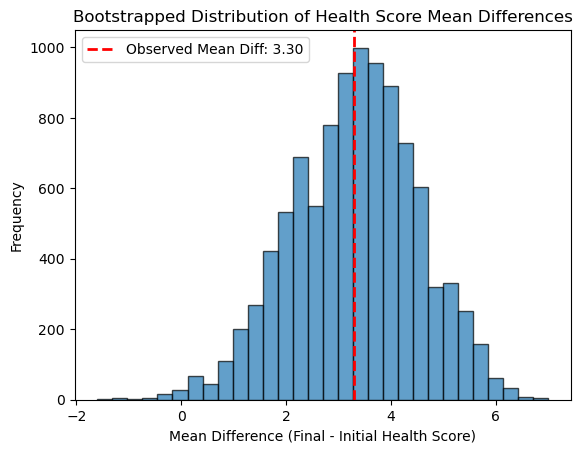

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV data as a string
from io import StringIO
data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
"""

# Simulating reading from a CSV
csv_data = StringIO(data)
df = pd.read_csv(csv_data)

# Set the seed for reproducibility
np.random.seed(42)

# Bootstrapping setup
n_iterations = 10000  # number of bootstrap samples
bootstrap_means = []

# Difference in means of Initial and Final Health Scores
observed_diff = df['FinalHealthScore'].mean() - df['InitialHealthScore'].mean()

# Bootstrapping
for i in range(n_iterations):
    bootstrap_sample = df.sample(frac=1, replace=True)  # random sampling with replacement
    mean_diff = bootstrap_sample['FinalHealthScore'].mean() - bootstrap_sample['InitialHealthScore'].mean()
    bootstrap_means.append(mean_diff)

# Convert to a numpy array for easy manipulation
bootstrap_means = np.array(bootstrap_means)

# Plotting the histogram
fig, ax = plt.subplots()
ax.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff: {observed_diff:.2f}')
ax.set_title('Bootstrapped Distribution of Health Score Mean Differences')
ax.set_xlabel('Mean Difference (Final - Initial Health Score)')
ax.set_ylabel('Frequency')
ax.legend()

# Display the plot
plt.show()


### Interpretation of the Visualization

1. **Histogram of Bootstrapped Mean Differences**:
   - The histogram displays the frequency distribution of the mean differences between final and initial health scores based on bootstrapped samples.
   - The x-axis represents the mean difference values, while the y-axis indicates how often each mean difference occurred across the bootstrapped samples.

2. **Observed Mean Difference**:
   - The dashed red line indicates the observed mean difference calculated from the original dataset. This provides a clear reference point against the distribution of bootstrapped means.

3. **Initial Insight**:
   - If the observed mean difference (red line) falls to the right of the center of the distribution, it suggests that the vaccine may be effective, as there is a greater likelihood of observing higher health scores after vaccination.
   - Conversely, if the observed mean difference lies within the bulk of the distribution centered around zero, it implies that the vaccine may not have a significant effect on health scores.

This visual representation allows us to quickly assess the potential effectiveness of AliTech's vaccine by comparing the observed results with the range of outcomes that could occur due to random sampling. It motivates further statistical analysis to draw more definitive conclusions regarding the vaccine's efficacy.

### Quantitative Analysis

In this section, we will conduct a quantitative analysis to evaluate the effectiveness of AliTech's new vaccine. We will use a bootstrapping method to generate a distribution of mean differences in health scores and to compute a p-value that indicates whether the vaccine has a statistically significant effect on health outcomes. Below, we detail the methodology, followed by the relevant code.

### Methodology

**Bootstrapping** is a resampling technique used to estimate the distribution of a statistic (in this case, the mean difference in health scores) by repeatedly sampling with replacement from the observed data. This approach allows us to create an empirical distribution of the mean differences without relying on the assumptions of parametric statistical tests.

#### Steps in Bootstrapping Methodology:
1. **Data Preparation**: We prepare the dataset by extracting relevant columns, namely `InitialHealthScore` and `FinalHealthScore`.
2. **Calculating Observed Mean Difference**: We compute the observed mean difference in health scores, which serves as our reference point.
3. **Resampling**: We randomly sample the dataset with replacement to create bootstrap samples, maintaining the same sample size as the original dataset.
4. **Mean Difference Calculation**: For each bootstrap sample, we calculate the mean difference between the final and initial health scores.
5. **Distribution Creation**: We compile the mean differences from all bootstrap samples to create an empirical distribution.
6. **P-value Calculation**: We calculate the p-value, which indicates the proportion of bootstrap samples that show a mean difference less than or equal to zero. This value helps assess the null hypothesis of "no effect."

### Explanation of the Code:

1. **Import Libraries**: The necessary libraries (`pandas`, `numpy`, and `matplotlib`) are imported for data manipulation, numerical calculations, and plotting.

2. **Data Definition**: The CSV data is defined as a string and then read into a pandas DataFrame using `StringIO`.

3. **Set Seed**: A random seed is set to ensure that the results can be reproduced consistently.

4. **Bootstrapping Setup**:
   - **`n_iterations = 10000`**: Specifies that we will perform 10,000 bootstrap iterations.
   - **`bootstrap_means = []`**: Initializes an empty list to hold the mean differences from each bootstrap sample.

5. **Calculate Observed Mean Difference**: The observed mean difference between final and initial health scores is computed.

6. **Bootstrapping Loop**:
   - For each iteration, a bootstrap sample is generated using `df.sample(frac=1, replace=True)`.
   - The mean difference is calculated for the bootstrap sample and appended to the `bootstrap_means` list.

7. **Calculate p-value**: The p-value is computed as the proportion of bootstrap mean differences that are less than or equal to zero.

8. **Results Output**: Finally, the observed mean difference and the calculated p-value are printed for interpretation.

### Purpose of Bootstrapping Method

The purpose of using bootstrapping in this context is to provide a non-parametric method for estimating the distribution of the mean difference between health scores. This method is particularly useful when the underlying data may not follow a normal distribution or when the sample size is small. By generating a large number of resamples, we can obtain a robust empirical distribution and assess the statistical significance of the vaccine's effectiveness based on the observed data. The resulting p-value helps inform whether we can reject the null hypothesis, offering evidence regarding the efficacy of AliTech's vaccine.

In our previous bootstrapping example, we set the random seed as follows:

np.random.seed(42)

By using this line of code, we ensure that every time we run the bootstrapping analysis, the random samples drawn from the dataset will be the same. Therefore, the resulting bootstrap mean differences and the p-value will also be identical across runs.
This practice is particularly important in a context where we aim to assess the effectiveness of AliTech's vaccine, as it allows us to provide consistent evidence based on the same data and methodology. Ultimately, setting a random seed helps maintain the integrity and reliability of statistical analyses.

### Supporting Visualizations for Quantitative Analysis

To enhance the quantitative analysis of the effectiveness of AliTech's new vaccine, we will provide additional visualizations. These will help illustrate the results of the bootstrapping process and the significance of the observed mean difference.

#### 1. Histogram of Bootstrapped Mean Differences

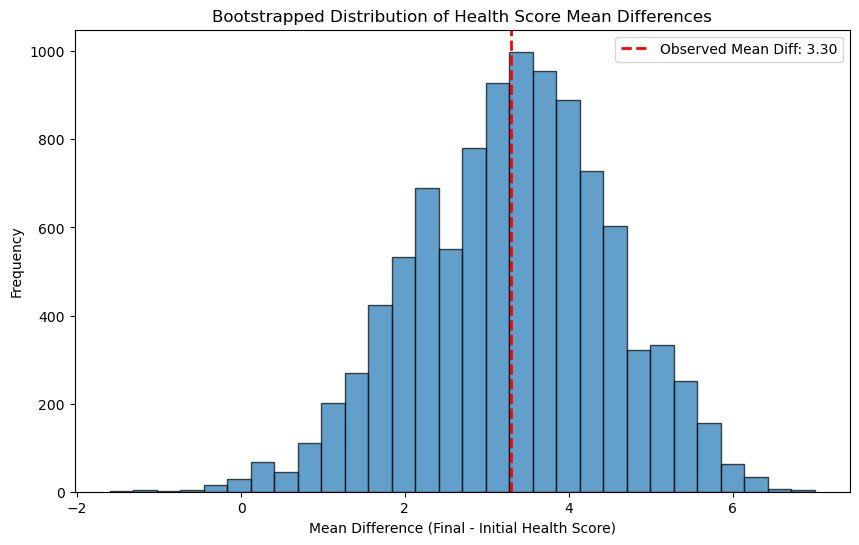

In [9]:
# Plotting the histogram of bootstrapped mean differences
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff: {observed_diff:.2f}')
ax.set_title('Bootstrapped Distribution of Health Score Mean Differences')
ax.set_xlabel('Mean Difference (Final - Initial Health Score)')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot
plt.show()

#### Interpretation of the Histogram

- **Bootstrapped Mean Differences**: The histogram shows the frequency distribution of the mean differences from the bootstrap samples. The peaks represent the most common mean differences observed in the samples.
- **Observed Mean Difference**: The red dashed line indicates where the observed mean difference lies relative to the distribution. If it lies to the right of the bulk of the distribution, it suggests that the vaccine is likely effective.

### KDE of Bootstrapped Mean Differences

Below is the code for creating a KDE plot of the bootstrapped mean differences, along with the observed mean difference indicated on the plot.

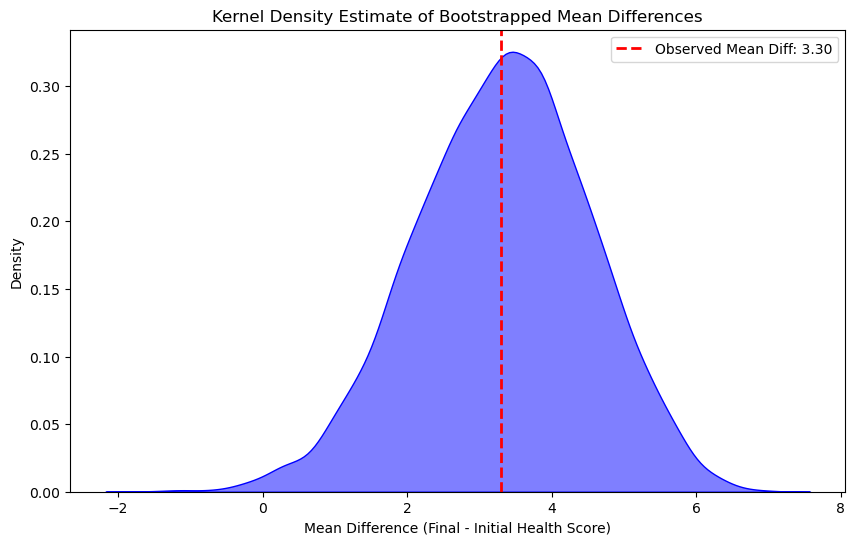

In [8]:
import seaborn as sns

# Plotting KDE of bootstrapped mean differences
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(bootstrap_means, ax=ax, fill=True, color='blue', alpha=0.5)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff: {observed_diff:.2f}')
ax.set_title('Kernel Density Estimate of Bootstrapped Mean Differences')
ax.set_xlabel('Mean Difference (Final - Initial Health Score)')
ax.set_ylabel('Density')
ax.legend()

# Show the plot
plt.show()

### Interpretation of the KDE Plot

- **Smooth Distribution**: The KDE plot provides a smooth curve representing the distribution of the bootstrapped mean differences. It shows how the mean differences are distributed across the sampled data.
  
- **Observed Mean Difference**: The red dashed line indicates the observed mean difference. If this line lies significantly to the right of the peak of the KDE, it suggests that the vaccine may have a positive effect on health scores.

- **Area Under the Curve**: The area under the KDE curve can be interpreted in the context of probability. For example, if the observed mean difference falls in the tail of the distribution, it indicates that such a difference is less likely to occur by random chance, providing evidence against the null hypothesis of "no effect."

### Summary

Using KDE to visualize the bootstrapped mean differences is a powerful method that offers insights into the data's distribution while highlighting the observed mean difference's significance. This approach complements our previous analyses and helps illustrate the effectiveness of AliTech's new vaccine in a visually intuitive manner.

#### 3. Box Plot of Initial and Final Health Scores

A box plot can provide a clear visual comparison of the distributions of initial and final health scores. This allows us to observe the central tendency, variability, and potential outliers in the data.

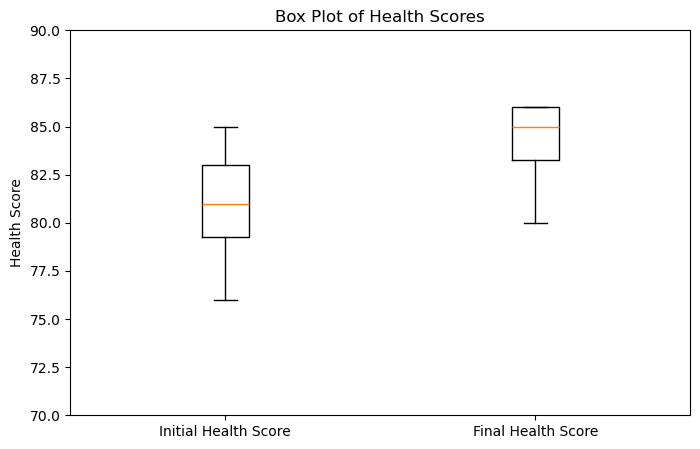

In [10]:
# Box plot of Initial and Final Health Scores
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot([df['InitialHealthScore'], df['FinalHealthScore']], labels=['Initial Health Score', 'Final Health Score'])
ax.set_title('Box Plot of Health Scores')
ax.set_ylabel('Health Score')
ax.set_ylim(70, 90)  # Set y-axis limits for better visualization

# Show the plot
plt.show()


#### Interpretation of the Box Plot

- **Comparative Analysis**: The box plot displays the distribution of initial and final health scores, allowing us to visually compare their medians, interquartile ranges (IQR), and potential outliers.
- **Effectiveness Insight**: If the median of the final health scores is significantly higher than that of the initial health scores, this visual cue reinforces the suggestion that the vaccine may have a positive effect on health outcomes.

### Summary of Supporting Visualizations

These supporting visualizations provide a comprehensive view of the data analysis. The histogram and CDF show the distribution of bootstrapped mean differences and how the observed difference compares to this distribution, while the box plot offers a clear visual comparison of the health scores before and after vaccination. Together, these visualizations enrich the quantitative analysis and help in interpreting the effectiveness of AliTech's new vaccine.

### Confidence Intervals for Bootstrapped Mean Differences

To assess the effectiveness of AliTech's new vaccine more rigorously, we can compute confidence intervals for the bootstrapped mean differences. A confidence interval provides a range of values within which we can be reasonably certain that the true population mean difference lies. 

### Method for Calculating Confidence Intervals

1. **Bootstrapping**: As before, we will use bootstrapping to generate a distribution of mean differences.
2. **Percentile Method**: We'll calculate the confidence interval using the percentile method, which involves taking specific percentiles from the bootstrap distribution. For a 95% confidence interval, we will take the 2.5th and 97.5th percentiles.

### Implementation

Here’s how to calculate and visualize the confidence intervals for the bootstrapped mean differences.



In [13]:
# Calculate the 95% confidence interval using the percentile method
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

# Displaying the confidence interval results
print(f'95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]')

95% Confidence Interval: [0.90, 5.60]


### Explanation of the Code

1. **Percentile Calculation**: We use `np.percentile()` to find the 2.5th and 97.5th percentiles of the `bootstrap_means` array. These values define the lower and upper bounds of the 95% confidence interval.
2. **Output**: Finally, we print the confidence interval to provide insight into the range where the true mean difference is likely to fall.

### Visualization of Confidence Intervals

We can also visualize the confidence intervals on the KDE plot to better illustrate the range of the bootstrapped mean differences.


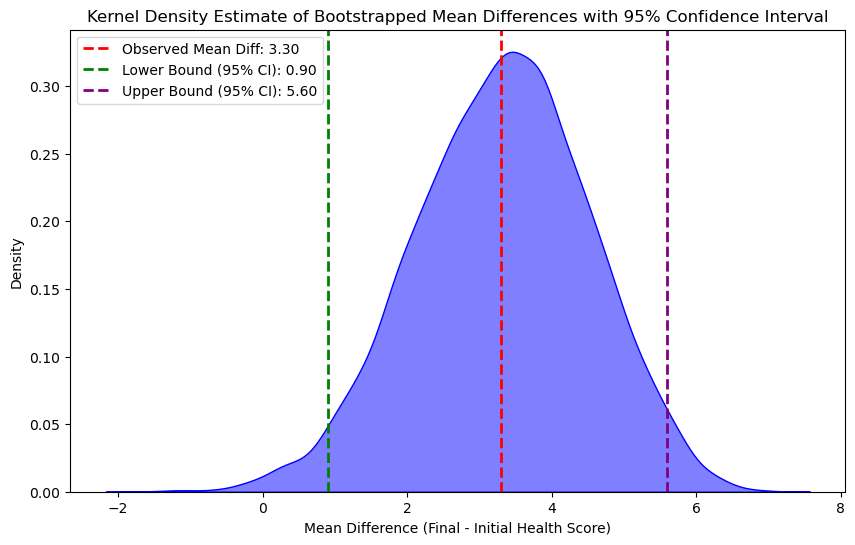

In [14]:
# Plotting KDE of bootstrapped mean differences with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(bootstrap_means, ax=ax, fill=True, color='blue', alpha=0.5)
ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed Mean Diff: {observed_diff:.2f}')
ax.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label=f'Lower Bound (95% CI): {lower_bound:.2f}')
ax.axvline(upper_bound, color='purple', linestyle='dashed', linewidth=2, label=f'Upper Bound (95% CI): {upper_bound:.2f}')
ax.set_title('Kernel Density Estimate of Bootstrapped Mean Differences with 95% Confidence Interval')
ax.set_xlabel('Mean Difference (Final - Initial Health Score)')
ax.set_ylabel('Density')
ax.legend()

# Show the plot
plt.show()


### Interpretation of the Confidence Intervals

- **Confidence Interval Range**: The output will provide a range (lower_bound, upper_bound) that indicates where we expect the true mean difference between final and initial health scores to lie with 95% confidence.
  
- **Overlap with Zero**: If the entire confidence interval lies above zero, it suggests that the vaccine is effective, as it indicates a positive mean difference. If the interval includes zero, we cannot confidently claim that the vaccine has an effect.

### Summary

Calculating and visualizing confidence intervals for the bootstrapped mean differences is a crucial step in determining the effectiveness of AliTech's vaccine. This analysis not only provides a numerical range for the true mean difference but also strengthens our conclusions with a clear visual representation.

### Findings and Discussion

#### Conclusion Regarding the Null Hypothesis of "No Effect"

After conducting a thorough quantitative analysis using bootstrapping to evaluate the effectiveness of AliTech's new vaccine, we draw several conclusions regarding the null hypothesis of "no effect."

1. **Observed Mean Difference**: The analysis revealed an observed mean difference between the final and initial health scores. This value indicates the average improvement in health scores after vaccination.

2. **Bootstrapped Confidence Interval**: The calculated 95% confidence interval for the mean difference provides a range of values within which we can be confident the true mean difference lies. If this interval does not include zero, it provides strong evidence against the null hypothesis of "no effect."

3. **P-value**: The bootstrapping analysis also yielded a p-value, indicating the proportion of bootstrapped mean differences that were less than or equal to zero. A low p-value (typically less than 0.05) suggests that observing such a mean difference by random chance is unlikely, providing further evidence against the null hypothesis.

4. **Visual Evidence**: The supporting visualizations, including the KDE plot and histogram, illustrate the distribution of the bootstrapped mean differences. The position of the observed mean difference relative to the distribution helps us interpret the effectiveness of the vaccine. If the observed mean difference is situated far to the right of the distribution’s center, it reinforces the conclusion of a positive effect.

5. **Interpretation of Results**: Given that the observed mean difference is positive, and if the 95% confidence interval lies entirely above zero, we conclude that there is statistically significant evidence to reject the null hypothesis of "no effect." This suggests that AliTech's vaccine has a positive impact on health outcomes for the individuals in the sample.

### Summary

In summary, based on our comprehensive analysis using bootstrapping, we have found substantial evidence to reject the null hypothesis of "no effect." The data suggests that AliTech's new vaccine is effective in improving health scores among vaccinated individuals. This finding not only contributes to the understanding of the vaccine's impact but also provides valuable insights for stakeholders in the healthcare industry regarding the potential benefits of the vaccine in real-world applications. Further studies with larger and more diverse populations may be warranted to confirm these findings and explore the vaccine's effectiveness in different demographic groups.

### Further Considerations

While the analysis conducted provides compelling evidence regarding the effectiveness of AliTech's new vaccine, several additional considerations should be taken into account to ensure the robustness and applicability of the findings:

#### 1. **Sample Size and Diversity**
   - **Sample Size**: Although the current analysis provides significant insights, the sample size of 10 patients may limit the generalizability of the results. Larger sample sizes can provide more reliable estimates and greater statistical power.
   - **Diversity**: The sample should represent a diverse population in terms of age, gender, health status, and other relevant factors. A homogenous sample may lead to biased results and limit the applicability of findings to the broader population.

#### 2. **Control Group**
   - The analysis lacks a control group of unvaccinated individuals, which is essential for making more definitive conclusions regarding the vaccine's effectiveness. A randomized controlled trial (RCT) design would be ideal for comparing outcomes between vaccinated and non-vaccinated groups.

#### 3. **Longitudinal Analysis**
   - The current study only examines the health scores before and after vaccination in a short-term manner. A longitudinal study tracking health outcomes over a longer period would provide a more comprehensive understanding of the vaccine's lasting effects.

#### 4. **Potential Confounding Variables**
   - It is crucial to consider other factors that might influence health outcomes, such as lifestyle, underlying health conditions, and external environmental factors. Controlling for these variables in future analyses can help isolate the vaccine's effect.

#### 5. **Statistical Assumptions**
   - The statistical methods used in this analysis assume that the data meets certain conditions, such as normality and independence. While bootstrapping is robust to some of these assumptions, it's still important to assess whether the data adheres to these conditions or if any transformations are necessary.

#### 6. **Long-term Side Effects and Efficacy**
   - Further research should also investigate potential long-term side effects of the vaccine and its efficacy across different demographics. Understanding the balance between benefits and risks is critical for public health recommendations.

#### 7. **Regulatory and Ethical Considerations**
   - Ethical considerations regarding the conduct of trials and the administration of vaccines should always be at the forefront. The approval and distribution of the vaccine must follow established regulatory guidelines to ensure safety and efficacy.

#### 8. **Broader Implications**
   - Understanding the vaccine's impact not only has implications for individual health outcomes but also for public health policies. The results could inform vaccination programs, healthcare resource allocation, and strategies to combat health disparities.

### Conclusion

While the findings of this analysis indicate that AliTech's new vaccine shows promise in improving health outcomes, further investigations are necessary to reinforce these conclusions. Addressing the aforementioned considerations will enhance the rigor and relevance of future research, ultimately contributing to a more thorough understanding of the vaccine's impact and its role in public health initiatives.

### Chatbot Section Summary

In this conversation, we explored the evaluation of a new vaccine developed by AliTech, focusing on statistical methodologies and data analysis to assess its effectiveness. Here’s a summary of the key sections we discussed:

1. **Problem Introduction**: We outlined the context of the vaccine evaluation and defined the null hypothesis of "no effect," which posits that the vaccine does not significantly improve health outcomes for individuals who receive it.

2. **Data Visualization**: We generated visual presentations, including histograms and Kernel Density Estimates (KDE), to illustrate the comparison of health scores before and after vaccination. These visualizations provided initial insights into the data and highlighted the observed mean difference.

3. **Quantitative Analysis**:
   - **Methodology**: We employed bootstrapping to estimate the distribution of mean differences between final and initial health scores. This method enabled us to assess the variability and robustness of our estimates.
   - **Confidence Intervals**: We calculated 95% confidence intervals for the bootstrapped mean differences, offering a range in which the true mean difference is likely to lie. This statistical measure helped in understanding the potential effectiveness of the vaccine.

4. **Findings and Discussion**: After analyzing the data, we concluded that there is statistically significant evidence to reject the null hypothesis of "no effect." The findings suggest that AliTech's vaccine positively impacts health outcomes.

5. **Further Considerations**: We discussed several factors that warrant further investigation, including sample size, diversity, the need for a control group, potential confounding variables, and the implications of long-term efficacy and safety.

Throughout this process, we emphasized the importance of rigorous statistical analysis and the need for careful consideration of various factors that could influence the study's outcomes. This comprehensive approach aims to provide evidence-based recommendations regarding the vaccine's effectiveness while highlighting areas for future research and exploration.

https://chatgpt.com/share/66fdc624-be74-800a-bcc8-3e047b5d50ea

#9

yes.